# Let's start by loading Graphlab Create and Matplotlib

In [1]:
import graphlab as gl
import matplotlib.pyplot as plt
%matplotlib inline
gl.canvas.set_target('ipynb')

[INFO] This non-commercial license of GraphLab Create is assigned to caseyoneill78@hotmail.comand will expire on September 26, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-1193 - Server binary: /usr/local/lib/python2.7/dist-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1446579091.log
[INFO] GraphLab Server Version: 1.6.1


In [2]:
data = gl.SFrame.read_csv('btcvol (1).csv')

PROGRESS: Finished parsing file /home/ubuntu/Data Analysis Practice/Bitcoin_Volatility/btcvol (1).csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.020089 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[str,float,float,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /home/ubuntu/Data Analysis Practice/Bitcoin_Volatility/btcvol (1).csv
PROGRESS: Parsing completed. Parsed 1905 lines in 0.01674 secs.


In [3]:
data.head()

date,price,logprice,return,volatility,volatility60
2010-08-16,0.0655,-2.72570513634,0.00305810635882,0.120569167844,None
2010-08-17,0.07,-2.65926003693,0.0664450994082,0.120579033144,None
2010-08-18,0.068,-2.68824757381,-0.0289875368733,0.120965418868,None
2010-08-19,0.0667,-2.70755032606,-0.0193027522545,0.120237505432,None
2010-08-20,0.0655,-2.72570513634,-0.0181548102804,0.119677466737,None
2010-08-21,0.0664,-2.7120582225,0.0136469138412,0.0839956282044,None
2010-08-22,0.066,-2.71810053696,-0.00604231445596,0.0741164022827,None
2010-08-23,0.0649,-2.73490765527,-0.0168071183164,0.0690504271696,None
2010-08-24,0.065,-2.73336800909,0.00153964618559,0.0673658642142,None
2010-08-25,0.0648,-2.73644967562,-0.00308166653741,0.064859219021,None


In [4]:
data.tail()

date,price,logprice,return,volatility,volatility60
2015-10-24,282.6605,5.64424653085,0.0185863312993,0.0144907889796,0.0140826075138
2015-10-25,283.0717,5.64570022244,0.00145369159618,0.0146642135832,0.0141190271428
2015-10-26,286.1325,5.65645499025,0.0107547678047,0.0145927000291,0.0140745600674
2015-10-27,294.3998,5.68493870751,0.0284837172577,0.0144149806444,0.0136932070082
2015-10-28,303.8866,5.7166546055,0.0317158979921,0.01446533317,0.0140156738744
2015-10-29,313.5861,5.74807396351,0.0314193580155,0.0147038111858,0.0144095441044
2015-10-30,326.0045,5.78691118495,0.0388372214381,0.015155348888,0.0148193437459
2015-10-31,312.4321,5.74438716557,-0.0425240193847,0.01605879298,0.0152765162732
2015-11-01,325.082,5.7840774582,0.0396902926301,0.0187853532091,0.0165360497955
2015-11-02,359.3523,5.88430324434,0.100225786141,0.0195957287713,0.017016522234


In [5]:
data.show()

In [6]:
data.show(view="Scatter Plot", x="price", y="return")

In [7]:
data.show(view="Scatter Plot", x="Price", y="Volatility")

In [8]:
train_data, test_data = data.random_split(0.8, seed=10101)

In [10]:
return_model = gl.linear_regression.create(train_data, target='price', features=['return'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 1459
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 1.001608     | 948.997392         | 692.82671

In [11]:
print test_data['price'].mean()
print return_model.evaluate(test_data)

193.943570492
{'max_error': 975.3926289827937, 'rmse': 242.48924608537968}


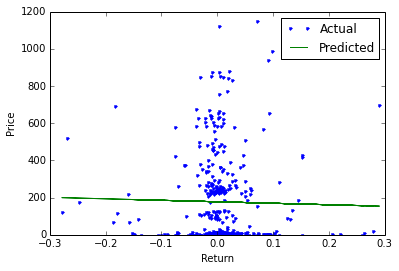

In [13]:
plt.plot(test_data['return'], test_data['price'], '.',
        test_data['return'], return_model.predict(test_data), '-')

plt.xlabel('Return')
plt.ylabel('Price')
plt.legend(['Actual', 'Predicted'])

In [14]:
return_model.get('coefficients')

name,index,value
(intercept),None,177.524256483
return,None,-79.9304735482


In [16]:
volatility_model = gl.linear_regression.create(train_data, target='price', features=['volatility'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 1461
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.000922     | 964.150459         | 778.76760

In [18]:
print test_data['volatility'].mean()
print volatility_model.evaluate(test_data)

0.0525173984596
{'max_error': 995.8964971914855, 'rmse': 241.6212527034086}


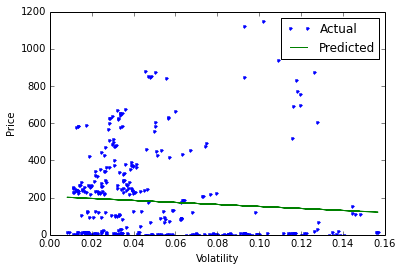

In [19]:
plt.plot(test_data['volatility'], test_data['price'], '.',
        test_data['volatility'], volatility_model.predict(test_data), '-')

plt.xlabel('Volatility')
plt.ylabel('Price')
plt.legend(['Actual', 'Predicted'])